In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [6]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 10})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 10}
# plt.rcParams['text.usetex'] = True
# plt.rc('font', **font)

## test 

    R4B0 - yes SR no hosing
    RWB0 - no SR no hosing

In [4]:
ySR = '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_R4B1/'
nSR = '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_RWB0/'

In [5]:
def make_yearlist(yrst, yrend, tr, dtype = 'grid_T'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'/gpfs/home/mep22dku/scratch/ModelRuns/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        #print(t2)
        ylist.append(t2[0])
    return ylist

## get out wfo which is actually empmp

In [6]:

ySR = 'TOM12_TJ_R4B1/'
nSR = 'TOM12_TJ_RWB0/'

ex = False
if ex:
    ySRs = xr.open_mfdataset(make_yearlist(1950,2020,ySR))
    nSRs = xr.open_mfdataset(make_yearlist(1950,2020,nSR))
    
    single_var = ySRs['wfo']
    new_ds = single_var.to_dataset()
    new_ds.to_netcdf('./R4B1_wfo.nc')

    single_var = nSRs['wfo']
    new_ds = single_var.to_dataset()
    new_ds.to_netcdf('./RWB0_wfo.nc')



## copy over meshmasks

In [7]:
ex = False
if ex:
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
    tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

    names  = ['ATL', 'PAC', 'IND', 'SO', 'ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

    for n in names:

        var_copy = tmesh['tmaskutil'].copy()
        var_copy.name = n
        udelej = np.zeros([1,149, 182])
        udelej[:,:,:] = tmask[n][:]
        var_copy.data = udelej
        tmesh[n] =var_copy

    tmesh.to_netcdf('/gpfs/home/mep22dku/scratch/SOZONE/UTILS/mesh_mask3_6.nc')

    tmesh

## look at the mask

Text(0.5, 0.98, 'colours assigned')

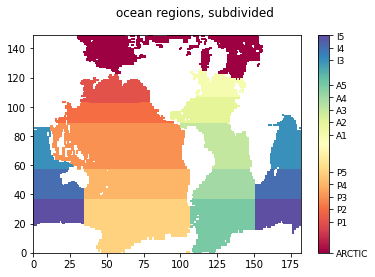

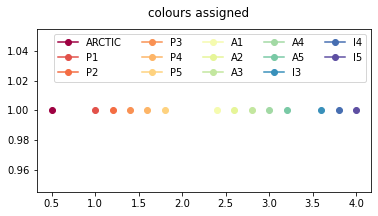

In [8]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/UTILS/mesh_mask3_6.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan


w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics)
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

fact = 0.2
fig = plt.figure(figsize=(30*fact,15*fact))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)
plt.suptitle('colours assigned')

## look at empmr in variants of gcb runs (toggle)

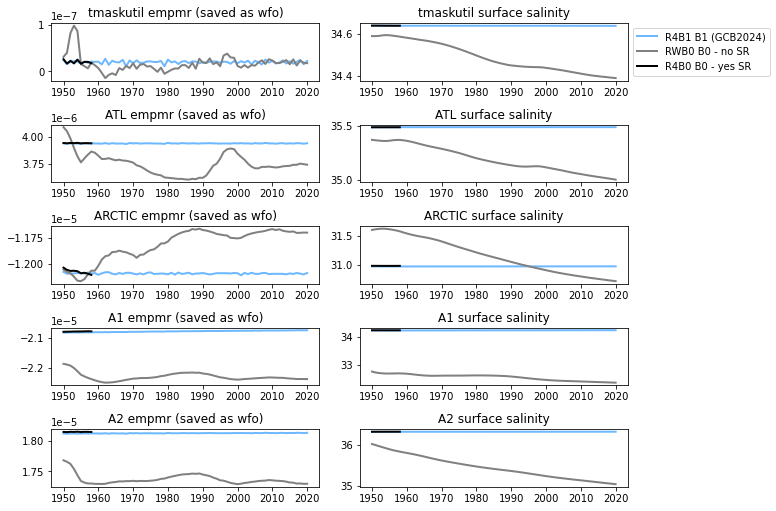

In [10]:
show = False
if show:

    colors_dict = {
        'R4B1':  '#6db8ff',
        'R4B0': 'k',
        'R4A1': '#de4231', 
        'R4C1': '#f3c108',
        'R4D1': '#02954f',
        'RWB0': 'grey',
    }

    lab_dic = {
        'R4B1':  'B1 (GCB2024)',
        'R4B0': 'B0 - yes SR',
        'R4A1': 'A1 (GCB2024)', 
        'R4C1': 'C1 (GCB2024)',
        'R4D1': 'D1 (GCB2024)',
        'RWB0': 'B0 - no SR',
    }


    ls_dic = {
        'R4B1':  '-','R4B0': ':','R4A1': '-', 
        'R4C1': ':','R4D1': ':','RWB0': ':',
    }

    lw_dic = {
        'R4B1':  1,'R4B0': 2.5,'R4A1': 1, 
        'R4C1': 2.5,'R4D1': 2.5,'RWB0': 2.5,
    }

    mods = ['R4B1','RWB0','R4B0']#'R4D1',

    fact = 0.9
    fig, axs = plt.subplots(5,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    regs = ['tmaskutil','ATL','ARCTIC','A1','A2']

    ind = 0


    for treg in regs:
        for mod in mods:

            tvar = 'wfo'
            w = xr.open_dataset(f'./data/{mod}_{tvar}.nc')
            tmask['test'] = tmask['csize']*tmask[treg]
            w = w[tvar].weighted(tmask['test']).mean(dim = ['y','x'])
            tval = w.indexes['time_counter'].to_datetimeindex()
            w['time_counter'] = tval
            w1 = w.groupby('time_counter.year').mean()
            axs[ind*2].plot(w1.year, w1, linestyle = '-',\
                     color = colors_dict[mod], lw = 2, label = f'{mod} {lab_dic[mod]}')
            axs
            tvar = 'sos'
            w = xr.open_dataset(f'./data/{mod}_{tvar}.nc')
            tmask['test'] = tmask['csize']*tmask[treg]
            w = w[tvar].weighted(tmask['test']).mean(dim = ['y','x'])
            tval = w.indexes['time_counter'].to_datetimeindex()
            w['time_counter'] = tval
            w1 = w.groupby('time_counter.year').mean()
            axs[ind*2+1].plot(w1.year, w1, linestyle = '-',\
                     color = colors_dict[mod], lw = 2, label = f'{mod} {lab_dic[mod]}')

            axs[ind*2+0].set_title(f'{treg} empmr (saved as wfo)')
            axs[ind*2+1].set_title(f'{treg} surface salinity')
        ind= ind+1

    axs[1].legend(bbox_to_anchor = [1,1])

    plt.tight_layout()

## look at salinity and empave for the targeted SR/no SR experiment 

KDD0 / KDB0 or KW of the same

In [11]:
ex = False
if ex:
    
    print('st')
    tdat = 'wfo'
    ySR = 'KDD0'
    nSR = 'KWD0'

    ySRs = xr.open_mfdataset(make_yearlist(1950,2020,f'TOM12_TJ_{ySR}'))
    nSRs = xr.open_mfdataset(make_yearlist(1950,2020,f'TOM12_TJ_{nSR}'))
    
    single_var = ySRs[tdat]
    new_ds = single_var.to_dataset()
    new_ds.to_netcdf(f'./{ySR}_{tdat}.nc')

    single_var = nSRs[tdat]
    new_ds = single_var.to_dataset()
    new_ds.to_netcdf(f'./{nSR}_{tdat}.nc')

    ySR = 'KDB0'
    nSR = 'KWB0'

    ySRs = xr.open_mfdataset(make_yearlist(1950,2020,f'TOM12_TJ_{ySR}'))
    nSRs = xr.open_mfdataset(make_yearlist(1950,2020,f'TOM12_TJ_{nSR}'))
    
    single_var = ySRs[tdat]
    new_ds = single_var.to_dataset()
    new_ds.to_netcdf(f'./{ySR}_{tdat}.nc')

    single_var = nSRs[tdat]
    new_ds = single_var.to_dataset()
    new_ds.to_netcdf(f'./{nSR}_{tdat}.nc')
 
    print('hw')
    tdat = 'sos'
    ySR = 'KDD0'
    nSR = 'KWD0'

    ySRs = xr.open_mfdataset(make_yearlist(1950,2020,f'TOM12_TJ_{ySR}'))
    nSRs = xr.open_mfdataset(make_yearlist(1950,2020,f'TOM12_TJ_{nSR}'))
    
    single_var = ySRs[tdat]
    new_ds = single_var.to_dataset()
    new_ds.to_netcdf(f'./{ySR}_{tdat}.nc')

    single_var = nSRs[tdat]
    new_ds = single_var.to_dataset()
    new_ds.to_netcdf(f'./{nSR}_{tdat}.nc')

    ySR = 'KDB0'
    nSR = 'KWB0'

    ySRs = xr.open_mfdataset(make_yearlist(1950,2020,f'TOM12_TJ_{ySR}'))
    nSRs = xr.open_mfdataset(make_yearlist(1950,2020,f'TOM12_TJ_{nSR}'))
    
    single_var = ySRs[tdat]
    new_ds = single_var.to_dataset()
    new_ds.to_netcdf(f'./{ySR}_{tdat}.nc')

    single_var = nSRs[tdat]
    new_ds = single_var.to_dataset()
    new_ds.to_netcdf(f'./{nSR}_{tdat}.nc')

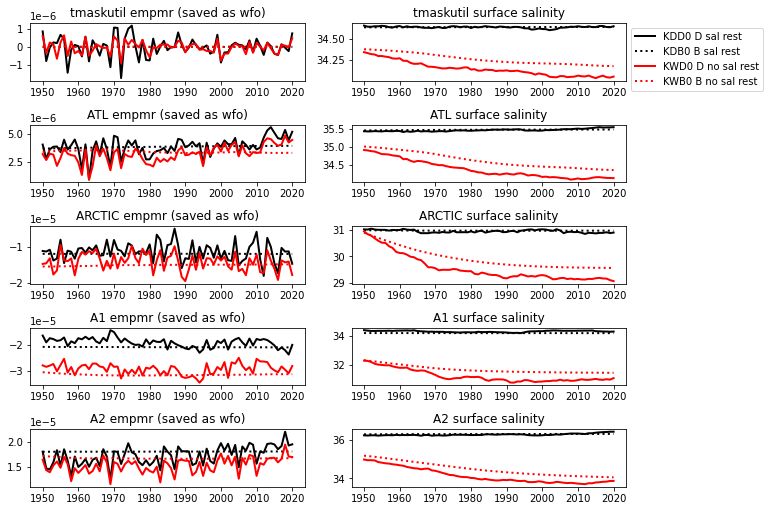

In [12]:
#KDD0 / KDB0 or KW of the same

colors_dict = {
    'KDD0':  'k',
    'KDB0': 'k',
    'KWD0': 'r', 
    'KWB0': 'r',

}

lab_dic = {
    'KDD0':  'D sal rest',
    'KDB0': 'B sal rest',
    'KWD0': 'D no sal rest', 
    'KWB0': 'B no sal rest',
}


ls_dic = {
    'KDD0':  '-',
    'KDB0': ':',
    'KWD0': '-', 
    'KWB0': ':',
}

lw_dic = {
    'KDD0':  1,
    'KDB0': 2,
    'KWD0': 1, 
    'KWB0': 2,
}

mods = ['KDD0','KDB0','KWD0', 'KWB0']#'R4D1',

fact = 0.9
fig, axs = plt.subplots(5,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

regs = ['tmaskutil','ATL','ARCTIC','A1','A2']

ind = 0

    
for treg in regs:
    for mod in mods:

        tvar = 'wfo'
        w = xr.open_dataset(f'./data/{mod}_{tvar}.nc')
        tmask['test'] = tmask['csize']*tmask[treg]
        w = w[tvar].weighted(tmask['test']).mean(dim = ['y','x'])
        tval = w.indexes['time_counter'].to_datetimeindex()
        w['time_counter'] = tval
        w1 = w.groupby('time_counter.year').mean()
        axs[ind*2].plot(w1.year, w1, linestyle = ls_dic[mod],\
                 color = colors_dict[mod], lw = 2, label = f'{mod} {lab_dic[mod]}')
        axs
        tvar = 'sos'
        w = xr.open_dataset(f'./data/{mod}_{tvar}.nc')
        tmask['test'] = tmask['csize']*tmask[treg]
        w = w[tvar].weighted(tmask['test']).mean(dim = ['y','x'])
        tval = w.indexes['time_counter'].to_datetimeindex()
        w['time_counter'] = tval
        w1 = w.groupby('time_counter.year').mean()
        axs[ind*2+1].plot(w1.year, w1, linestyle = ls_dic[mod],\
                 color = colors_dict[mod], lw = 2, label = f'{mod} {lab_dic[mod]}')
        
        axs[ind*2+0].set_title(f'{treg} empmr (saved as wfo)')
        axs[ind*2+1].set_title(f'{treg} surface salinity')
    ind= ind+1
    
axs[1].legend(bbox_to_anchor = [1,1])

plt.tight_layout()

In [13]:
def make_yearlist(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/cdftools/MOCresults/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        tyr = yrs[i]
        ty = f'{baseDir}{tr}_1m_{tyr}0101*MOC.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

def get_max_amoc(moc_dataset):

    atl_at_26 = np.squeeze(moc_dataset.zomsfatl.sel(y=94).values)
    tshape = np.shape(atl_at_26)
    len_ts = tshape[0]

    max_atl = np.zeros(len_ts)

    for i in range(0,len(max_atl)):
        max_atl[i] = np.nanmax(atl_at_26[i,:])
        
    return max_atl

#R4B0_moc = make_yearlist(1920, 2023, 'TOM12_TJ_R4B0')

In [14]:
#mods = ['KDD0','KDB0','KWD0', 'KWB0']

KDD0_moc = make_yearlist(1920, 2023, 'TOM12_TJ_KDD0')
KWD0_moc = make_yearlist(1920, 2023, 'TOM12_TJ_KWD0')
KDB0_moc = make_yearlist(1920, 2023, 'TOM12_TJ_KDB0')
KWB0_moc = make_yearlist(1920, 2023, 'TOM12_TJ_KWB0')


KDD0_mocdat = xr.open_mfdataset(KDD0_moc) 
KDB0_mocdat = xr.open_mfdataset(KDB0_moc) 
KWD0_mocdat = xr.open_mfdataset(KWD0_moc) 
KWB0_mocdat = xr.open_mfdataset(KWB0_moc) 
nicetime  = KDD0_mocdat.indexes['time_counter'].to_datetimeindex()

KDD0_max_amoc = get_max_amoc(KDD0_mocdat)
KDB0_max_amoc = get_max_amoc(KDB0_mocdat)
KWD0_max_amoc = get_max_amoc(KWD0_mocdat)
KWB0_max_amoc = get_max_amoc(KWB0_mocdat)

In [15]:
data_vars = {'amoc':(['time_counter'], KDD0_max_amoc,),}
coords = {'time_counter': (['time_counter'], nicetime)}
KDD0_max_amoc = xr.Dataset(data_vars=data_vars,coords=coords)

data_vars = {'amoc':(['time_counter'], KDB0_max_amoc,),}
coords = {'time_counter': (['time_counter'], nicetime)}
KDB0_max_amoc = xr.Dataset(data_vars=data_vars,coords=coords)


In [16]:
data_vars = {'amoc':(['time_counter'], KWD0_max_amoc,),}
coords = {'time_counter': (['time_counter'], nicetime)}
KWD0_max_amoc = xr.Dataset(data_vars=data_vars,coords=coords)

data_vars = {'amoc':(['time_counter'], KWB0_max_amoc,),}
coords = {'time_counter': (['time_counter'], nicetime)}
KWB0_max_amoc = xr.Dataset(data_vars=data_vars,coords=coords)


In [17]:
KDD0yr = KDD0_max_amoc.groupby('time_counter.year').mean()
KDB0yr = KDB0_max_amoc.groupby('time_counter.year').mean()
KWD0yr = KWD0_max_amoc.groupby('time_counter.year').mean()
KWB0yr = KWB0_max_amoc.groupby('time_counter.year').mean()

Text(0, 0.5, 'Sv')

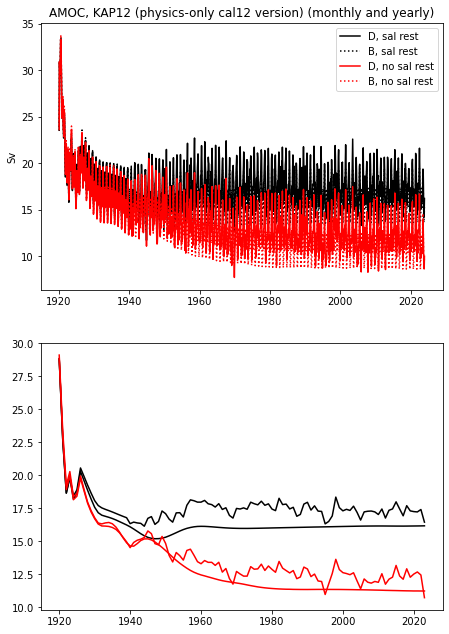

In [18]:

fact = 0.9
fig, axs = plt.subplots(2,1, figsize=(8*fact, 12*fact), facecolor='w', edgecolor='k')

axs[0].plot(nicetime, KDD0_max_amoc.amoc, label = 'D, sal rest', color = colors_dict['KDD0'])
axs[0].plot(nicetime, KDB0_max_amoc.amoc, label = 'B, sal rest', color = colors_dict['KDB0'], linestyle = ':')
axs[0].plot(nicetime, KWD0_max_amoc.amoc, label = 'D, no sal rest', color = colors_dict['KWD0'])
axs[0].plot(nicetime, KWB0_max_amoc.amoc, label = 'B, no sal rest', color = colors_dict['KWB0'], linestyle = ':')

axs[0].set_title('AMOC, KAP12 (physics-only cal12 version)')
axs[0].legend()

axs[1].plot(KDD0yr.year, KDD0yr.amoc, label = 'D, sal rest', color = colors_dict['KDD0'])
axs[1].plot(KDD0yr.year, KDB0yr.amoc, label = 'D, sal rest', color = colors_dict['KDD0'])
axs[1].plot(KDD0yr.year, KWD0yr.amoc, label = 'D, sal rest', color = colors_dict['KWD0'])
axs[1].plot(KDD0yr.year, KWB0yr.amoc, label = 'D, sal rest', color = colors_dict['KWD0'])

# axs[1].plot(nicetime, KDB0_max_amoc.amoc, label = 'B, sal rest', color = colors_dict['KDB0'], linestyle = ':')
# axs[1].plot(nicetime, KWD0_max_amoc.amoc, label = 'D, no sal rest', color = colors_dict['KWD0'])
# axs[1].plot(nicetime, KWB0_max_amoc.amoc, label = 'B, no sal rest', color = colors_dict['KWB0'], linestyle = ':')

axs[0].set_title('AMOC, KAP12 (physics-only cal12 version) (monthly and yearly)')
axs[0].legend()
axs[0].set_ylabel('Sv')

## what does the precipitation climatology look like in the north atlantic

## make era precipitation files more easy to look at

In [3]:
import xarray as xr
import numpy as np
import glob

ex = False

if ex:
    for yr in range(1940,2023):
        print(yr)
        odir = '/gpfs/data/greenocean/software/products/ERA5_v202303_TJ/'
        #ndir = '/gpfs/data/greenocean/software/products/ERA5_v202303_TJ/hosingArun/'
        w = xr.open_dataset(f'{odir}/era5_bulk_13_y{yr}.nc', decode_times=False)
        w2 = xr.open_dataset(f'{odir}/era5_bulk_14_y{yr}.nc', decode_times=False)
        times = pd.date_range(f"{yr}/01/01",f"{yr+1}/01/01",freq='D',closed='left')
        merged_dataset = xr.merge([w, w2])
        merged_dataset['time_counter'] = times
        merged_dataset.to_netcdf(f'./data/ERAprecip_{yr}.nc')

In [4]:
def make_yearlistERA(yrst, yrend):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'./data/ERAprecip_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

#eralist = xr.open_mfdataset(make_yearlistERA(1980,2020))
#seasonal_avg = eralist.groupby("time_counter.season").mean("time_counter")
#seasonal_avg.to_netcdf('./data/era_1980-2020-clim.nc')

In [27]:
tvar = 'wfo'
KDD0 = xr.open_dataset(f'./data/KDD0_{tvar}.nc')
KWD0 = xr.open_dataset(f'./data/KWD0_{tvar}.nc')
KDB0 = xr.open_dataset(f'./data/KDB0_{tvar}.nc')
KWB0 = xr.open_dataset(f'./data/KWB0_{tvar}.nc')

KDD0['time_counter'] = KDD0.indexes['time_counter'].to_datetimeindex()
KWD0['time_counter'] = KWD0.indexes['time_counter'].to_datetimeindex()
KDB0['time_counter'] = KDB0.indexes['time_counter'].to_datetimeindex()
KWB0['time_counter'] = KWB0.indexes['time_counter'].to_datetimeindex()


In [32]:
KWB0_clim = KWB0.sel(time_counter=slice(f'{1980}-01-01', f'{2019}-12-31')).groupby("time_counter.season").mean("time_counter")
KDB0_clim = KDB0.sel(time_counter=slice(f'{1980}-01-01', f'{2019}-12-31')).groupby("time_counter.season").mean("time_counter")
KWD0_clim = KWD0.sel(time_counter=slice(f'{1980}-01-01', f'{2019}-12-31')).groupby("time_counter.season").mean("time_counter")
KDD0_clim = KDD0.sel(time_counter=slice(f'{1980}-01-01', f'{2019}-12-31')).groupby("time_counter.season").mean("time_counter")

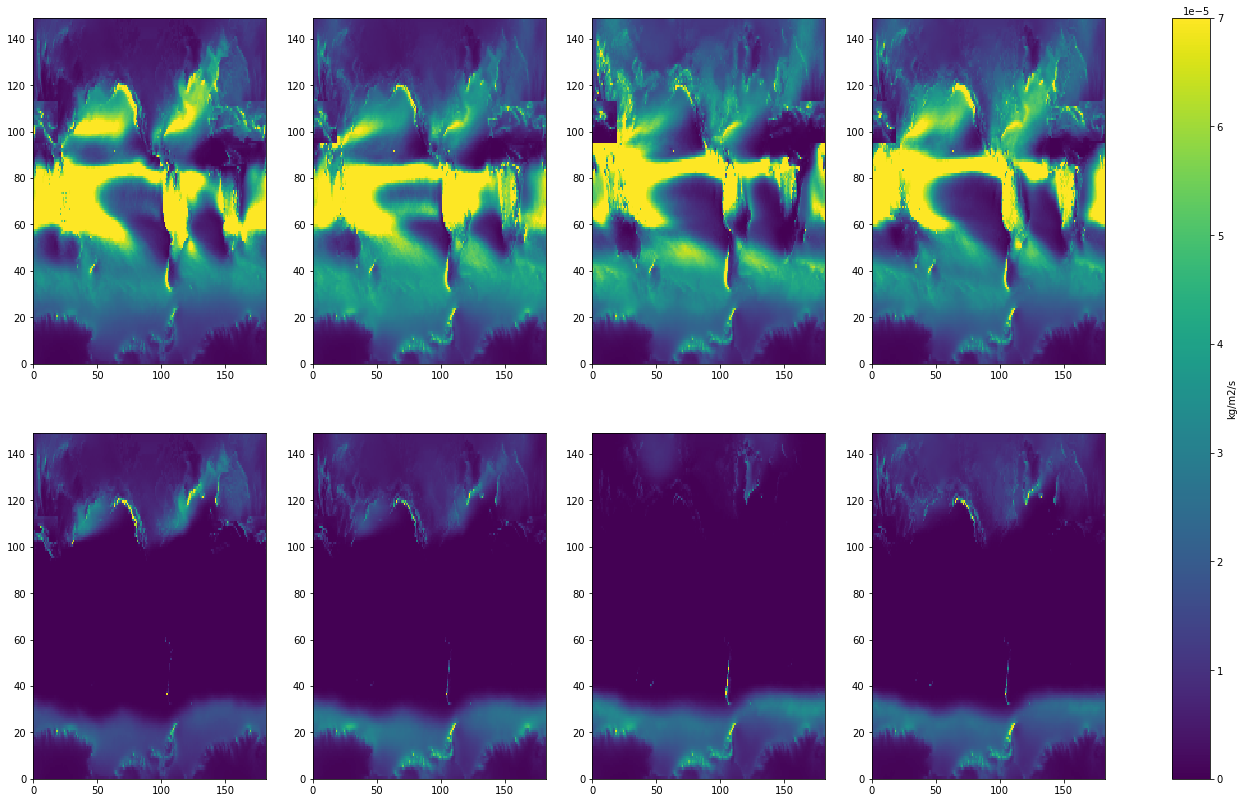

In [47]:
seasonal_avg = xr.open_dataset('./data/era_1980-2020-clim.nc')
fact = 2
fig, axs = plt.subplots(2,4, figsize=(12*fact, 7*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

seas = ['DJF','MAM','JJA','SON']

for i in range(0,4):
    axs[i].pcolormesh(seasonal_avg.prra.sel(season = seas[i]).values, vmin = 0, vmax = 7e-5)
    im1 = axs[i+4].pcolormesh(seasonal_avg.prsn.sel(season = seas[i]).values, vmin = 0, vmax = 7e-5)
cbar = fig.colorbar(im1, ax=axs, orientation='vertical')
cbar.set_label("kg/m2/s")

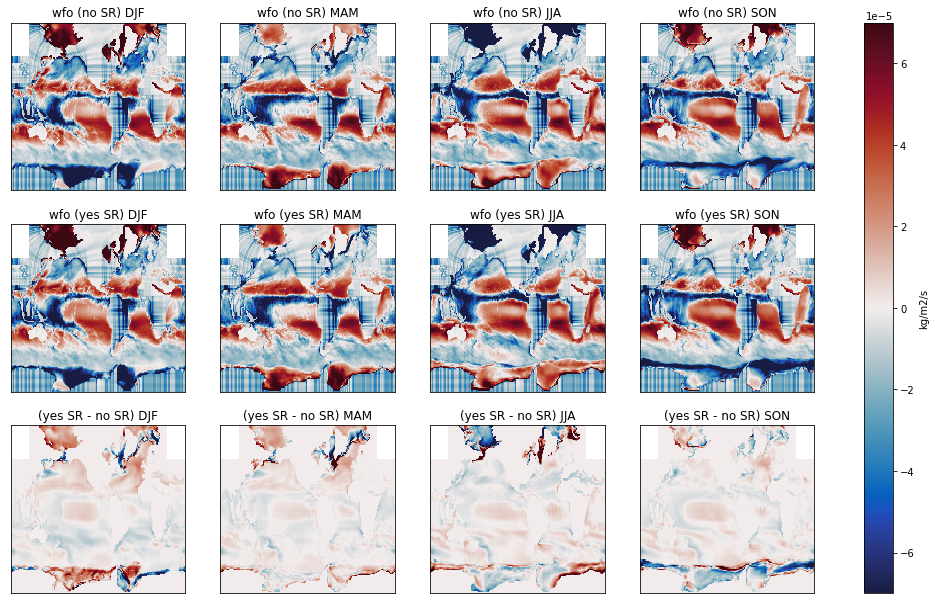

In [46]:
seasonal_avg = xr.open_dataset('./data/era_1980-2020-clim.nc')
fact = 1.5
fig, axs = plt.subplots(3,4, figsize=(12*fact, 7*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

seas = ['DJF','MAM','JJA','SON']

for i in range(0,4):
    axs[i].pcolormesh(KWB0_clim.wfo.sel(season = seas[i]).values, vmin = -7e-5, vmax = 7e-5, cmap = cm.balance)
    axs[i].set_title(f'wfo (no SR) {seas[i]}')
    im1 = axs[i+4].pcolormesh(KDB0_clim.wfo.sel(season = seas[i]).values, vmin = -7e-5, vmax = 7e-5, cmap = cm.balance)
    axs[i+4].set_title(f'wfo (yes SR) {seas[i]}')
    diff = KDB0_clim.wfo.sel(season = seas[i]).values - KWB0_clim.wfo.sel(season = seas[i]).values
    axs[i+8].pcolormesh(diff, vmin = -7e-5, vmax = 7e-5, cmap = cm.balance)
    axs[i+8].set_title(f'(yes SR - no SR) {seas[i]}')
    
for i in range(0,12):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
cbar = fig.colorbar(im1, ax=axs, orientation='vertical')
cbar.set_label("kg/m2/s")

## how different is wfo from D runs vs B runs
    different enough that it matters

In [50]:
for i in range(0,4):
    diff = KDB0_clim.wfo.sel(season = seas[i]).values - KWB0_clim.wfo.sel(season = seas[i]).values
    print(np.nanmean(diff))
    diff = KDD0_clim.wfo.sel(season = seas[i]).values - KWD0_clim.wfo.sel(season = seas[i]).values
    print(np.nanmean(diff))
    
    print()

1.0180553e-06
4.938722e-07

7.9090006e-07
6.2496855e-07

2.798859e-07
4.3271592e-07

-9.903014e-07
-7.032698e-07



## get climatological difference

In [108]:
KWB0_40y = KWB0.sel(time_counter=slice(f'{1980}-01-01', f'{2019}-12-31')).groupby("time_counter.month").mean("time_counter")
KDB0_40y = KDB0.sel(time_counter=slice(f'{1980}-01-01', f'{2019}-12-31')).groupby("time_counter.month").mean("time_counter")
KWD0_40y = KWD0.sel(time_counter=slice(f'{1980}-01-01', f'{2019}-12-31')).groupby("time_counter.month").mean("time_counter")
KDD0_40y = KDD0.sel(time_counter=slice(f'{1980}-01-01', f'{2019}-12-31')).groupby("time_counter.month").mean("time_counter")

diff_D = KDD0_40y - KWD0_40y
diff_D = diff_D.rename({"month": "time"})
diff_clim = diff_D.wfo.values
print(np.shape(diff_clim))

nlys = np.array([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335,365])
lys = np.array([1, 32, 61, 92, 122, 153, 183, 214, 245, 275, 306, 336,366])

lydiff = np.zeros([366,149,182])
nlydiff = np.zeros([365,149,182])

#corrector
for i in range(0,12):
    
    lydiff[lys[i]:lys[i+1],:,:] = diff_clim[i,:,:]
    nlydiff[nlys[i]:nlys[i+1],:,:] = diff_clim[i,:,:]
    
    


(12, 149, 182)


### two ways to get fake rain out

In [109]:
yr = 2000
w = xr.open_dataset(f'./data/ERAprecip_{yr}.nc')

w['prra_corr'] = w.prra - lydiff

In [118]:
x = 140; y = 120
lydiffh = lydiff[:,y,x]
np.nanmean(lydiffh)

7.082967318846848e-06

2.9184356393950668e-05
2.8902887e-05


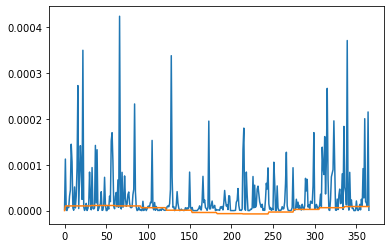

In [119]:
print(np.nanmean(w.prra_corr))
print(np.nanmean(w.prra))

x = 120; y = 100

rain = w.prra[:,y,x].values
lydiffh = lydiff[:,y,x]
plt.plot(rain)
plt.plot(lydiffh)


In [133]:
import numpy as np

def evenly_subtract(arr, x):
    """
    Subtracts the value `x` evenly between the non-zero elements of the array.
    The value `x` is divided by the number of non-zero elements, and the result is subtracted from each non-zero element.
    """
    # Identify the indices of non-zero elements
    non_zero_indices = np.nonzero(arr)[0]
    arr2 = np.copy(arr)
    # If there are no non-zero elements, return the array as is
    if len(non_zero_indices) == 0:
        return arr

    # Calculate how much to subtract from each non-zero element
    subtraction_value = x / len(non_zero_indices)
    print(subtraction_value)

    # Subtract the calculated value from each non-zero element
    arr2[non_zero_indices] -= subtraction_value

    return arr2

# Example array with 31 numbers (some zeros included)
arr1 = np.array([1, 0, 3, 0, 5, 6, 0, 8, 0, 10, 0, 12, 13, 0, 15, 0, 0, 18, 19, 20, 0, 22, 0, 24, 0, 26, 0, 28, 29, 0, 31]).astype(float)

# The value to evenly subtract
x = 10

# Apply the function
result = evenly_subtract(arr1, x)

# Print the result
print(arr1)
print(np.sum(arr1))
print(result)
print(np.sum(result))

0.5555555555555556
[ 1.  0.  3.  0.  5.  6.  0.  8.  0. 10.  0. 12. 13.  0. 15.  0.  0. 18.
 19. 20.  0. 22.  0. 24.  0. 26.  0. 28. 29.  0. 31.]
290.0
[ 0.44444444  0.          2.44444444  0.          4.44444444  5.44444444
  0.          7.44444444  0.          9.44444444  0.         11.44444444
 12.44444444  0.         14.44444444  0.          0.         17.44444444
 18.44444444 19.44444444  0.         21.44444444  0.         23.44444444
  0.         25.44444444  0.         27.44444444 28.44444444  0.
 30.44444444]
280.0


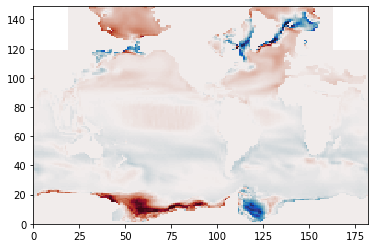

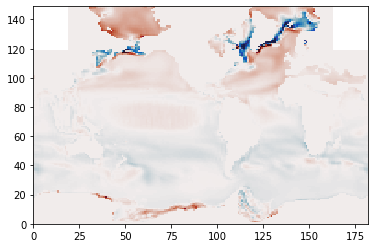

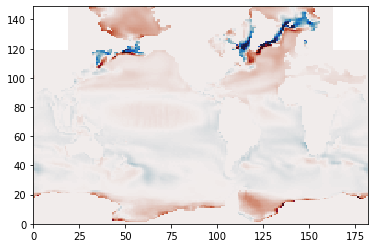

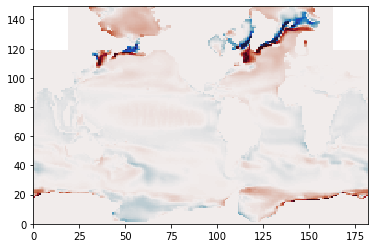

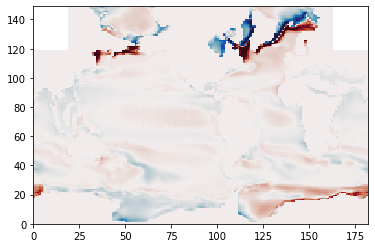

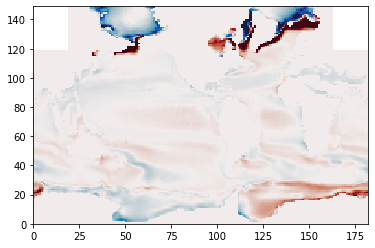

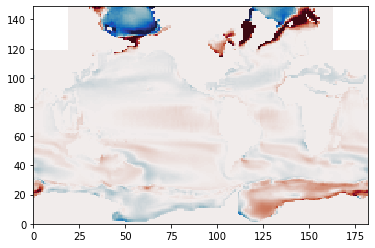

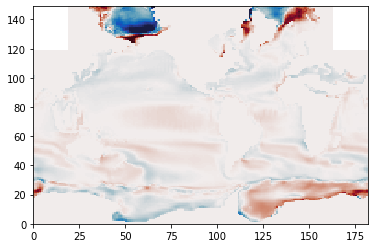

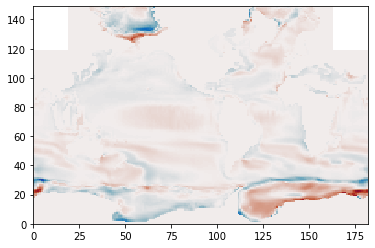

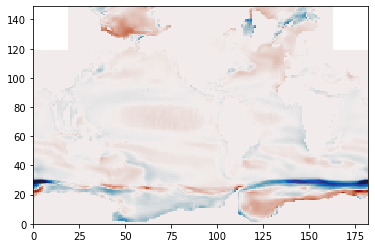

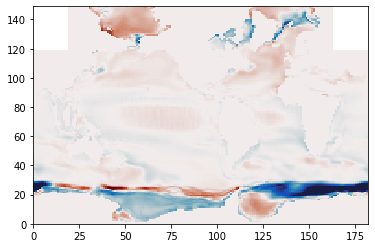

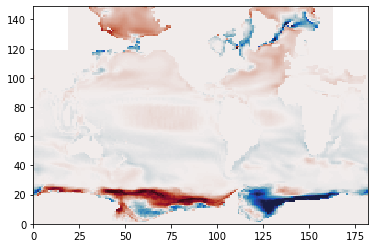

In [143]:
np.shape(diff_clim)
for i in range(0,12):
    plt.figure()
    plt.pcolormesh(diff_clim[i,:,:], vmin = -1e-4, vmax = 1e-4, cmap = cm.balance)